In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)

# Combine the data into a single dataset
combine_clinical_mouse_data = pd.merge(clinical_trial_data, mouse_drug_data, on="Mouse ID")

# Display the data table for preview
combine_clinical_mouse_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_response = combine_clinical_mouse_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
df_tumor_response = tumor_response.reset_index()

# Preview DataFrame
df_tumor_response.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
mean_tumor_error = combine_clinical_mouse_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_tumor_response_error = mean_tumor_error.reset_index()

# Preview DataFrame
df_tumor_response_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
df_tumor_response_reformat = df_tumor_response.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]
# Preview that Reformatting worked
df_tumor_response_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [6]:
df_tumor_response_error_reformat = df_tumor_response_error.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]
df_tumor_response_error_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


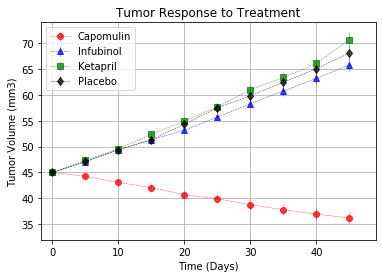

In [7]:
# Generate the Plot (with Error Bars)

Capomulin = df_tumor_response_reformat["Capomulin"]
Infubinol = df_tumor_response_reformat["Infubinol"]
Ketapril = df_tumor_response_reformat["Ketapril"]
Placebo = df_tumor_response_reformat["Placebo"]

df_Capomulin = Capomulin.reset_index()
df_Infubinol = Infubinol.reset_index()
df_Ketapril = Ketapril.reset_index()
df_Placebo = Placebo.reset_index()

plt.xlim(-1.75,49)
plt.ylim(32,74)

plt.errorbar(df_Capomulin["Timepoint"], df_Capomulin["Capomulin"],yerr = df_tumor_response_error_reformat['Capomulin'], marker="o", color="red",
           alpha= 0.75,label = "Capomulin",linestyle="dashed", linewidth=0.50)
plt.errorbar(df_Infubinol["Timepoint"], df_Infubinol["Infubinol"],df_tumor_response_error_reformat['Infubinol'],marker="^", color="blue",
           alpha= 0.75,label = "Infubinol",linestyle="dashed", linewidth=0.50)
plt.errorbar(df_Ketapril["Timepoint"], df_Ketapril["Ketapril"],df_tumor_response_error_reformat['Ketapril'], marker="s", color="green",
           alpha= 0.75,label = "Ketapril",linestyle="dashed", linewidth=0.50)
plt.errorbar(df_Placebo["Timepoint"], df_Placebo["Placebo"],df_tumor_response_error_reformat['Placebo'], marker="d", color="black",
           alpha= 0.75,label = "Placebo",linestyle="dashed", linewidth=0.50)


plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc = "upper left")
plt.grid()

# Save the Figure
plt.savefig("data/TumorResponse.png")
plt.show()




In [8]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response = combine_clinical_mouse_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
df_metastatic_response = metastatic_response.reset_index()

# Preview DataFrame
df_metastatic_response.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mean_metastatic_error = combine_clinical_mouse_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
df_metastatic_response_error = mean_metastatic_error.reset_index()

# Preview DataFrame
df_metastatic_response_error.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [11]:
# Minor Data Munging to Re-Format the Data Frames
df_metastatic_response_reformat = df_metastatic_response.pivot(index = "Timepoint",columns = "Drug")["Metastatic Sites"]
# Preview that Reformatting worked
df_metastatic_response_reformat.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
df_metastatic_response_err_reformat = df_metastatic_response_error.pivot(index = "Timepoint",columns = "Drug")["Metastatic Sites"]
# Preview that Reformatting worked
df_metastatic_response_err_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


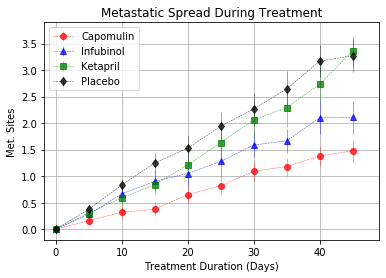

In [13]:
# Generate the Plot (with Error Bars)

Capomulin = df_metastatic_response_reformat["Capomulin"]
Infubinol = df_metastatic_response_reformat["Infubinol"]
Ketapril = df_metastatic_response_reformat["Ketapril"]
Placebo = df_metastatic_response_reformat["Placebo"]

df_Capomulin = Capomulin.reset_index()
df_Infubinol = Infubinol.reset_index()
df_Ketapril = Ketapril.reset_index()
df_Placebo = Placebo.reset_index()

plt.xlim(-1.75,49)
plt.ylim(-0.2,3.9)

plt.errorbar(df_Capomulin["Timepoint"], df_Capomulin["Capomulin"],yerr = df_metastatic_response_err_reformat['Capomulin'], marker="o", color="red",
           alpha= 0.75,label = "Capomulin",linestyle="dashed", linewidth=0.50)
plt.errorbar(df_Infubinol["Timepoint"], df_Infubinol["Infubinol"],df_metastatic_response_err_reformat['Infubinol'],marker="^", color="blue",
           alpha= 0.75,label = "Infubinol",linestyle="dashed", linewidth=0.50)
plt.errorbar(df_Ketapril["Timepoint"], df_Ketapril["Ketapril"],df_metastatic_response_err_reformat['Ketapril'], marker="s", color="green",
           alpha= 0.75,label = "Ketapril",linestyle="dashed", linewidth=0.50)
plt.errorbar(df_Placebo["Timepoint"], df_Placebo["Placebo"],df_metastatic_response_err_reformat['Placebo'], marker="d", color="black",
           alpha= 0.75,label = "Placebo",linestyle="dashed", linewidth=0.50)


plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc = "upper left")
plt.grid()

# Save the Figure
plt.savefig("data/MetastaticResponse.png")
plt.show()




## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = combine_clinical_mouse_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
df_survival_rate = survival_rate.reset_index()

# Preview DataFrame
df_survival_rate.head()



,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
df_survival_rate_reformat = df_survival_rate.pivot(index = "Timepoint",columns = "Drug")["Mouse ID"]
# Preview that Reformatting worked
df_survival_rate_reformat



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


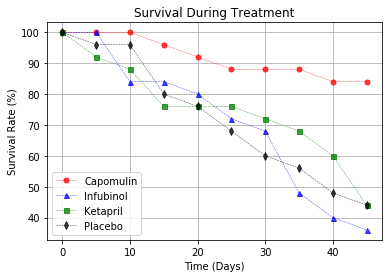

In [16]:
# Generate the Plot (Accounting for percentages)
survival_rate_Capomulin = 100 * df_survival_rate_reformat["Capomulin"] / df_survival_rate_reformat["Capomulin"].max()
survival_rate_Infubinol = 100 * df_survival_rate_reformat["Infubinol"] / df_survival_rate_reformat["Infubinol"].max()
survival_rate_Ketapril = 100 * df_survival_rate_reformat["Ketapril"] / df_survival_rate_reformat["Ketapril"].max()
survival_rate_Placebo = 100 * df_survival_rate_reformat["Placebo"] / df_survival_rate_reformat["Placebo"].max()

plt.plot(survival_rate_Capomulin, marker="o", color = "red",alpha= 0.75,label = "Capomulin", linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(survival_rate_Infubinol, marker="^", color = "blue",alpha= 0.75,label = "Infubinol",linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(survival_rate_Ketapril, marker="s", color = "green",alpha= 0.75,label = "Ketapril",linestyle="dashed", markersize=5, linewidth=0.50)
plt.plot(survival_rate_Placebo, marker="d", color = "black",alpha= 0.75,label = "Placebo",linestyle="dashed", markersize=5, linewidth=0.50)

plt.title("Survival During Treatment") 
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("data/MetastaticResponse.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [54]:
# Calculate the percent changes for each drug
drug_percent_change =  100 * (df_survival_rate_reformat.iloc[9] - df_survival_rate_reformat.iloc[0]) / df_survival_rate_reformat.iloc[9]

# Display the data to confirm
drug_percent_change

Drug
Capomulin    -19.047619
Ceftamin     -92.307692
Infubinol   -177.777778
Ketapril    -127.272727
Naftisol     -92.307692
Placebo     -127.272727
Propriva    -271.428571
Ramicane     -25.000000
Stelasyn    -136.363636
Zoniferol    -78.571429
dtype: float64

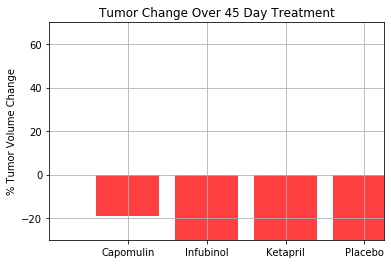

In [56]:
# Store all Relevant Percent Changes into a Tuple
percent_change = (drug_percent_change["Capomulin"], 
               drug_percent_change["Infubinol"], 
               drug_percent_change["Ketapril"], 
               drug_percent_change["Placebo"])

x_axis = np.arange(len(percent_change)) 

# Splice the data between passing and failing drugs
plt.subplots()


# Orient widths. Add labels, tick marks, etc. 
plt.ylabel('% Tumor Volume Change')
plt.ylim(-30,70)
plt.xlim(-1, len(x_axis)-0.75)
plt.title('Tumor Change Over 45 Day Treatment')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])

plt.bar(x_axis, percent_change, color='r', alpha=0.75, align="center")
plt.grid()

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("data/SummaryGraph.png")

# Show the Figure
# fig.show()

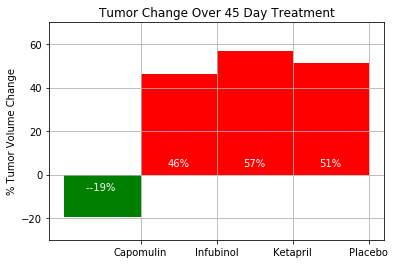